Problem 3
=========

In [61]:
import pandas_datareader.data as web
import datetime
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

def to_precision(x,p):
    """
    returns a string representation of x formatted with a precision of p

    Based on the webkit javascript implementation taken from here:
    https://code.google.com/p/webkit-mirror/source/browse/JavaScriptCore/kjs/number_object.cpp
    """

    x = float(x)

    if x == 0.:
        return "0." + "0"*(p-1)

    out = []

    if x < 0:
        out.append("-")
        x = -x

    e = int(math.log10(x))
    tens = math.pow(10, e - p + 1)
    n = math.floor(x/tens)

    if n < math.pow(10, p - 1):
        e = e -1
        tens = math.pow(10, e - p+1)
        n = math.floor(x / tens)

    if abs((n + 1.) * tens - x) <= abs(n * tens -x):
        n = n + 1

    if n >= math.pow(10,p):
        n = n / 10.
        e = e + 1

    m = "%.*g" % (p, n)

    if e < -2 or e >= p:
        out.append(m[0])
        if p > 1:
            out.append(".")
            out.extend(m[1:p])
        out.append('e')
        if e > 0:
            out.append("+")
        out.append(str(e))
    elif e == (p -1):
        out.append(m)
    elif e >= 0:
        out.append(m[:e+1])
        if e+1 < len(m):
            out.append(".")
            out.extend(m[e+1:])
    else:
        out.append("0.")
        out.extend(["0"]*-(e+1))
        out.append(m)

    return "".join(out)



In [62]:
# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader
GDP = web.DataReader("GDPC1", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
GDP = GDP.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logGDP = np.log(GDP.values)

In [2]:
# download data from FRED using pandas datareader
CON = web.DataReader("PCEC96", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
#CON = CON.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logCON = np.log(CON.values)

# Use only values from 1960 onwards
#logCON = logCON[56:]

print(len(CON))

217


In [3]:
# download data from FRED using pandas datareader
INVS = web.DataReader("GPDIC1", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
INVS = INVS.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logINVS = np.log(INVS.values)

# Use only values from 1960 onwards
#logINVS = logINVS[56:]

print(len(INVS))

229


In [4]:
# download data from FRED using pandas datareader
DEF = web.DataReader("GDPDEF", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
DEF = DEF.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logDEF = np.log(DEF.values)

# Use only values from 1960 onwards
#logDEF = logDEF[56:]

print(len(DEF))

229


In [5]:
GDPfreq, GDPper = sig.periodogram(logGDP, axis=0)
CONfreq, CONper = sig.periodogram(logCON, axis=0)
INVSfreq, INVSper = sig.periodogram(logINVS, axis=0)
DEFfreq, DEFper = sig.periodogram(logDEF, axis=0)

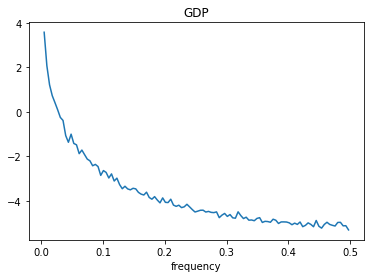

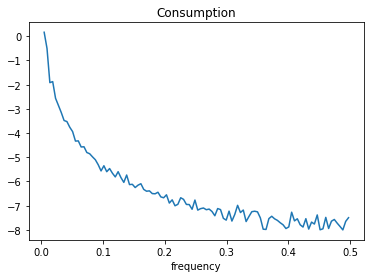

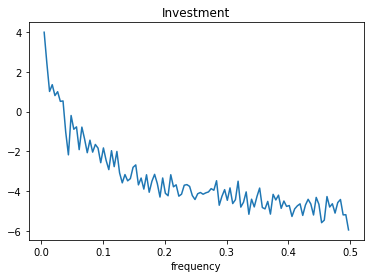

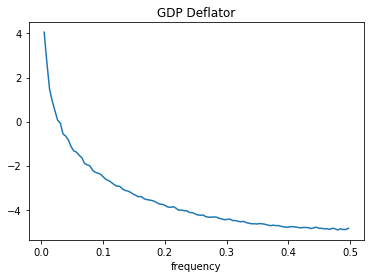

In [6]:
plt.plot(GDPfreq[1:], np.log(GDPper[1:]))
plt.title('GDP')
plt.xlabel('frequency')
plt.show()

plt.plot(CONfreq[1:], np.log(CONper[1:]))
plt.title('Consumption')
plt.xlabel('frequency')
plt.show()

plt.plot(INVSfreq[1:], np.log(INVSper[1:]))
plt.title('Investment')
plt.xlabel('frequency')
plt.show()

plt.plot(DEFfreq[1:], np.log(DEFper[1:]))
plt.title('GDP Deflator')
plt.xlabel('frequency')
plt.show()

Problem 4
=========

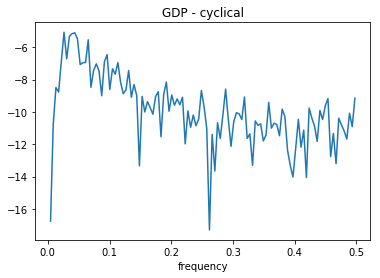

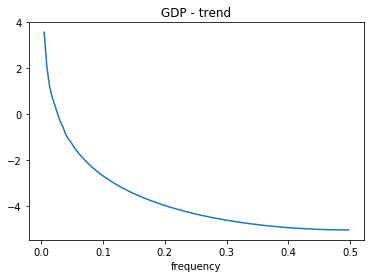

In [7]:
GDPcy, GDPtr = sm.tsa.filters.hpfilter(logGDP, 1600)

GDPfreq, GDPcyper = sig.periodogram(GDPcy, axis=0)

plt.plot(GDPfreq[1:], np.log(GDPcyper[1:]))
plt.title('GDP - cyclical')
plt.xlabel('frequency')
plt.show()

GDPfreq, GDPcyper = sig.periodogram(GDPtr, axis=0)

plt.plot(GDPfreq[1:], np.log(GDPcyper[1:]))
plt.title('GDP - trend')
plt.xlabel('frequency')
plt.show()

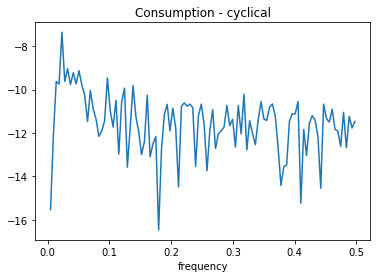

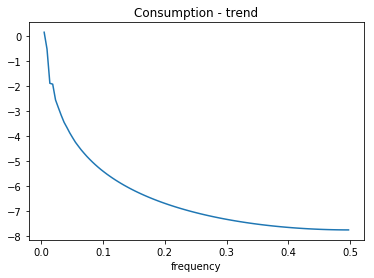

In [8]:
CONcy, CONtr = sm.tsa.filters.hpfilter(logCON, 1600)

CONfreq, CONcyper = sig.periodogram(CONcy, axis=0)

plt.plot(CONfreq[1:], np.log(CONcyper[1:]))
plt.title('Consumption - cyclical')
plt.xlabel('frequency')
plt.show()

CONfreq, CONcyper = sig.periodogram(CONtr, axis=0)

plt.plot(CONfreq[1:], np.log(CONcyper[1:]))
plt.title('Consumption - trend')
plt.xlabel('frequency')
plt.show()

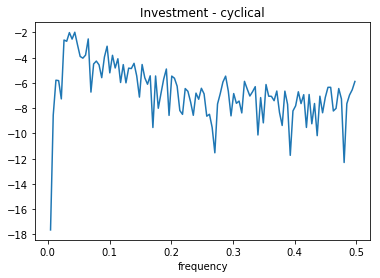

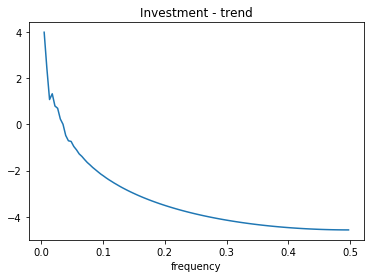

In [9]:
INVScy, INVStr = sm.tsa.filters.hpfilter(logINVS, 1600)

INVSfreq, INVScyper = sig.periodogram(INVScy, axis=0)

plt.plot(INVSfreq[1:], np.log(INVScyper[1:]))
plt.title('Investment - cyclical')
plt.xlabel('frequency')
plt.show()

INVSfreq, INVScyper = sig.periodogram(INVStr, axis=0)

plt.plot(INVSfreq[1:], np.log(INVScyper[1:]))
plt.title('Investment - trend')
plt.xlabel('frequency')
plt.show()

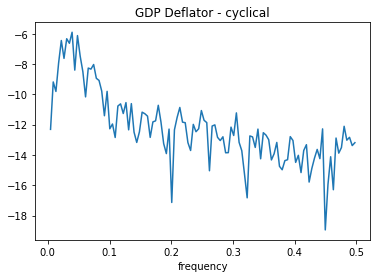

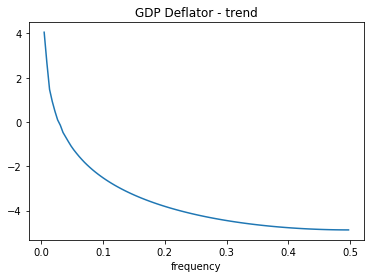

In [10]:
DEFcy, DEFtr = sm.tsa.filters.hpfilter(logDEF, 1600)

DEFfreq, DEFcyper = sig.periodogram(DEFcy, axis=0)

plt.plot(DEFfreq[1:], np.log(DEFcyper[1:]))
plt.title('GDP Deflator - cyclical')
plt.xlabel('frequency')
plt.show()

DEFfreq, DEFcyper = sig.periodogram(DEFtr, axis=0)

plt.plot(DEFfreq[1:], np.log(DEFcyper[1:]))
plt.title('GDP Deflator - trend')
plt.xlabel('frequency')
plt.show()

Problem 5
======

In [11]:
lamb = np.array ([100, 400, 1600, 6400, 25600])

for x in lamb:
    print('Values for lambda: ', x)
    GDPcy, GDPtr = sm.tsa.filters.hpfilter(logGDP, x)
    CONcy, CONtr = sm.tsa.filters.hpfilter(logCON, x)
    INVScy, INVStr = sm.tsa.filters.hpfilter(logINVS, x)
    DEFcy, DEFtr = sm.tsa.filters.hpfilter(logDEF, x)
    
    GDPcy_std = np.std(GDPcy)
    GDPcyb = GDPcy[:-1]
    GDPcya = GDPcy[1:]
    GDPcy_auto = np.corrcoef(GDPcyb, GDPcya)[0, 1]
    GDPcy_corr = np.corrcoef(GDPcy, GDPcy)[0, 1]
    
    print('Standard Deviation for GDP: ', GDPcy_std)
    print('Autocorrelation for GDP: ', GDPcy_auto)

    CONcy_std = np.std(CONcy)
    CONcyb = CONcy[:-1]
    CONcya = CONcy[1:]
    CONcy_auto = np.corrcoef(CONcyb, CONcya)[0, 1]
    CONcy_corr = np.corrcoef(CONcy, GDPcy[12:])[0, 1]
    
    print('Standard Deviation for Consumption: ', CONcy_std)
    print('Autocorrelation for Consumption: ', CONcy_auto)
    print('Correlation of GDP with Consumption: ', CONcy_corr)

    INVScy_std = np.std(INVScy)
    INVScyb = INVScy[:-1]
    INVScya = INVScy[1:]
    INVScy_auto = np.corrcoef(INVScyb, INVScya)[0, 1]
    INVScy_corr = np.corrcoef(INVScy, GDPcy)[0, 1]

    print('Standard Deviation for Investment: ', INVScy_std)
    print('Autocorrelation for Investment: ', INVScy_auto)
    print('Correlation of GDP with Investment: ', INVScy_corr)

    DEFcy_std = np.std(DEFcy)
    DEFcyb = DEFcy[:-1]
    DEFcya = DEFcy[1:]
    DEFcy_auto = np.corrcoef(DEFcyb, DEFcya)[0, 1]
    DEFcy_corr = np.corrcoef(DEFcy, GDPcy)[0, 1]
    
    print('Standard Deviation for GDP Deflator: ', DEFcy_std)
    print('Autocorrelation for GDP Deflator: ', DEFcy_auto)
    print('Correlation of GDP with GDP Deflator: ', DEFcy_corr)
    
    print('\n')

Values for lambda:  100
Standard Deviation for GDP:  0.00859381844873
Autocorrelation for GDP:  0.687960106218
Standard Deviation for Consumption:  0.00242608312067
Autocorrelation for Consumption:  0.0475162072484
Correlation of GDP with Consumption:  0.0297538745022
Standard Deviation for Investment:  0.0414523078246
Autocorrelation for Investment:  0.634619379215
Correlation of GDP with Investment:  0.89228371474
Standard Deviation for GDP Deflator:  0.00328929606489
Autocorrelation for GDP Deflator:  0.806045221364
Correlation of GDP with GDP Deflator:  -0.300793364298


Values for lambda:  400
Standard Deviation for GDP:  0.0114989916571
Autocorrelation for GDP:  0.801978773687
Standard Deviation for Consumption:  0.00272658801322
Autocorrelation for Consumption:  0.235318039281
Correlation of GDP with Consumption:  0.0445935622574
Standard Deviation for Investment:  0.0534548471815
Autocorrelation for Investment:  0.758071290393
Correlation of GDP with Investment:  0.912466962124

In [12]:
import matplotlib

%matplotlib notebook

fig = plt.figure()

lamb = np.array ([100, 400, 1600, 6400, 25600])

for x in lamb:
    INVScy, INVStr = sm.tsa.filters.hpfilter(logINVS, x)

    plt.plot(INVStr, label = 'Lambda = ' + str(x))
    
plt.plot(logINVS, 'k', label = 'Investment Time Series')
plt.title('Investment')
plt.xlabel('Time')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

Problem 6
======

In [13]:
#Data Collection 

#Govt Spending

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader
GOVS = web.DataReader("W068RCQ027SBEA", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
GOVS = GOVS.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logGOVS = np.log(GOVS.values)

print(np.shape(GOVS))

(229, 1)


In [14]:
#Net Exports

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader
NETEX = web.DataReader("NETEXP", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
NETEX = NETEX.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logNETEX = NETEX.values/GDP.values

In [15]:
#Exports

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader
EXPGSC1 = web.DataReader("EXPGSC1", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
EXPGSC1 = EXPGSC1.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logEXPGSC1 = np.log(EXPGSC1.values)

print(np.shape(logEXPGSC1))

(229, 1)


In [71]:
#Imports

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader
IMP = web.DataReader("B021RX1Q020SBEA", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
IMP = IMP.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logIMP = np.log(IMP.values)

[[ 4.832]
 [ 4.839]
 [ 4.809]
 [ 4.76 ]
 [ 4.756]
 [ 4.768]
 [ 4.832]
 [ 4.855]
 [ 4.886]
 [ 4.907]
 [ 4.92 ]
 [ 4.932]
 [ 4.908]
 [ 4.932]
 [ 4.957]
 [ 4.954]
 [ 4.952]
 [ 4.975]
 [ 5.001]
 [ 5.028]
 [ 4.991]
 [ 5.103]
 [ 5.107]
 [ 5.154]
 [ 5.18 ]
 [ 5.205]
 [ 5.259]
 [ 5.27 ]
 [ 5.286]
 [ 5.278]
 [ 5.291]
 [ 5.342]
 [ 5.4  ]
 [ 5.415]
 [ 5.473]
 [ 5.465]
 [ 5.366]
 [ 5.546]
 [ 5.533]
 [ 5.521]
 [ 5.518]
 [ 5.538]
 [ 5.535]
 [ 5.551]
 [ 5.539]
 [ 5.612]
 [ 5.634]
 [ 5.563]
 [ 5.7  ]
 [ 5.664]
 [ 5.684]
 [ 5.728]
 [ 5.774]
 [ 5.744]
 [ 5.716]
 [ 5.724]
 [ 5.689]
 [ 5.741]
 [ 5.723]
 [ 5.713]
 [ 5.607]
 [ 5.524]
 [ 5.604]
 [ 5.656]
 [ 5.717]
 [ 5.759]
 [ 5.799]
 [ 5.832]
 [ 5.878]
 [ 5.887]
 [ 5.873]
 [ 5.887]
 [ 5.952]
 [ 5.955]
 [ 5.968]
 [ 5.982]
 [ 5.979]
 [ 5.984]
 [ 5.969]
 [ 5.991]
 [ 5.991]
 [ 5.916]
 [ 5.842]
 [ 5.894]
 [ 5.936]
 [ 5.937]
 [ 5.926]
 [ 5.954]
 [ 5.925]
 [ 5.909]
 [ 5.954]
 [ 5.914]
 [ 5.936]
 [ 6.011]
 [ 6.086]
 [ 6.134]
 [ 6.211]
 [ 6.252]
 [ 6.277]
 [ 6.306]


In [18]:
#Employment

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader
EMP = web.DataReader("LREM25TTUSQ156N", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
EMP = EMP.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logEMP = np.log(EMP.values)

print(len(logEMP))

229


In [19]:
#Weekly Hours Worked

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

# download data from FRED using pandas datareader
HOURS = web.DataReader("HOHWMN02USQ065S", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
HOURS = HOURS.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logHOURS = np.log(HOURS.values)

print(len(logHOURS))

229


In [21]:
#Civillian Participation Labor Rate

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

LABPARP = web.DataReader("CIVPART", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
LABPARP  = LABPARP .resample('3M').mean()

# take the natural log of the series and convert to numpy array
logLABPARP  = np.log(LABPARP .values)

print(len(logLABPARP))

229


In [22]:
#Unemployment Rate

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

UNEMP = web.DataReader("UNRATE", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
UNEMP = UNEMP.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logUNEMP = np.log(UNEMP.values)

print(len(logUNEMP))

229


In [23]:
#Civilian Labor Force

# set start and end dates
start = datetime.datetime(1960, 1, 1)
end = datetime.datetime(2017, 1, 1)

LAB = web.DataReader("CLF16OV", "fred", start, end) 

# convert to quarterly frequencies by averaging over the three months in the quarter
LAB = LAB.resample('3M').mean()

# take the natural log of the series and convert to numpy array
logLAB = np.log(LAB.values)

print(len(logLAB))

229


In [26]:
#Labor Productivity 

logLABPROD = np.log(GDP.values / (LAB.values * HOURS.values))

print(len(logLABPROD))

229


In [27]:
NomW = web.DataReader("A576RC1", "fred", start, end)
NomW = NomW.resample('3M').mean()
logNomW = np.log(NomW.values)

FFRate = web.DataReader("FEDFUNDS", "fred", start, end)
FFRate = FFRate.resample('3M').mean()
logFFRate = np.log(FFRate.values)

MS = web.DataReader("M2SL", "fred", start, end)
MS = MS.resample('3M').mean()
logMS = np.log(MS.values)

CPI = web.DataReader("CPIAUCSL", "fred", start, end)
CPI = CPI.resample('3M').mean()
logCPI = np.log(CPI.values)

RealW = NomW.values / CPI.values
logRealW = np.log(RealW)

RealI = FFRate.values / CPI.values
logRealI = np.log(RealI)

RealMS = MS.values / CPI.values
logRealMS = np.log(RealMS)

In [96]:
import scipy as sp

variables = [logGDP, logCON, logINVS, logGOVS, logNETEX, logEXPGSC1, logIMP, logEMP, logHOURS, logLAB, logNomW, logRealW,\
      logFFRate, logRealI, logMS, logRealMS, logDEF, logCPI, logLABPROD, logUNEMP, logLABPARP]
sets = ["Real GDP", "Consumption", "Investment", "Govt. Spend", "Net Exports", "Exports", "Imports", "Employment", \
       "Hours Worked", "Total Labor", "Nominal Wages", "Real Wages", "Nominal I/R", "Real I/R", "Nominal MS", \
       "Real MS", "GDP Deflator", "CP Index", "Labor Prod.", "Unemployment", "Participation"]

HP = lambda x: sm.tsa.filters.hpfilter(x, 1600)[0]
FD = lambda x: np.diff(x)
BP = lambda x: sm.tsa.filters.bkfilter(x)
LT = lambda x: sp.signal.detrend(x, type = "linear")

methods = [HP, FD, BP, LT]
method_name = ["HP", "First Differencing", "BP", "LT"]

print("Variable \t Standard Deviation \t Relative to GDP \t Auto-Correlation \t Correlation w GDP \n")

for m in range (0, len(methods)):
    print('Filter Method: ', str(method_name[m]))
    
    data_len = len(logGDP)
    temp_data = logGDP.reshape((1,data_len))[0]
    
    GDPcy = methods[m](temp_data)
    GDPcy_std = np.std(GDPcy)
    GDPrel = GDPcy_std/GDPcy_std
    GDPcyb = GDPcy[:-1]
    GDPcya = GDPcy[1:]
    GDPcy_auto = np.corrcoef(GDPcyb, GDPcya)[0, 1]
    GDPcy_corr = np.corrcoef(GDPcy, GDPcy)[0, 1]
    
    print("Real GDP \t\t", round(GDPcy_std,3), "\t\t\t", round(GDPrel,3), "\t\t\t", round(GDPcy_auto,3), "\t\t\t", round(GDPcy_corr,3))
    
    for i in range (1, len(variables)):
        
        data_len = len(variables[i])
        temp_data = variables[i].reshape((1,data_len))[0]
        
        if sets[i] == "Consumption":
            
            cy = methods[m](temp_data)
            cy_std = np.std(cy)
            cy_rel = cy_std / GDPcy_std
            cyb = cy[:-1]
            cya = cy[1:]
            cy_auto = np.corrcoef(cyb, cya)[0, 1]
            cy_corr = np.corrcoef(cy, GDPcy[12:])[0, 1]
            
        elif sets[i] == "Imports":
            
            cy = methods[m](temp_data)
            cy_std = np.std(cy)
            cy_rel = cy_std / GDPcy_std
            cyb = cy[:-1]
            cya = cy[1:]
            cy_auto = np.corrcoef(cyb, cya)[0, 1]
            cy_corr = np.corrcoef(cy, GDPcy[7:])[0, 1]
        
        else:
            cy = methods[m](temp_data)
            cy_std = np.std(cy)
            cy_rel = cy_std / GDPcy_std
            cyb = cy[:-1]
            cya = cy[1:]
            cy_auto = np.corrcoef(cyb, cya)[0, 1]
            cy_corr = np.corrcoef(cy, GDPcy)[0, 1]
        
        print(str(sets[i]), "\t\t", round(cy_std,3), "\t\t\t", round(cy_rel,3), "\t\t\t", round(cy_auto,3), "\t\t\t", round(cy_corr,3))
        
    print("\n")

Variable 	 Standard Deviation 	 Relative to GDP 	 Auto-Correlation 	 Correlation w GDP 

Filter Method:  HP
Real GDP 		 0.015 			 1.0 			 0.866 			 1.0
Consumption 		 0.003 			 0.236 			 0.52 			 0.125
Investment 		 0.066 			 4.513 			 0.831 			 0.904
Govt. Spend 		 0.017 			 1.186 			 0.78 			 -0.473
Net Exports 		 0.003 			 0.199 			 0.783 			 -0.469
Exports 		 0.042 			 2.838 			 0.664 			 0.433
Imports 		 0.049 			 3.337 			 0.784 			 0.07
Employment 		 0.01 			 0.662 			 0.502 			 0.667
Hours Worked 		 0.009 			 0.612 			 0.783 			 0.732
Total Labor 		 0.004 			 0.251 			 0.731 			 0.235
Nominal Wages 		 0.016 			 1.077 			 0.888 			 0.534
Real Wages 		 0.018 			 1.211 			 0.894 			 0.806
Nominal I/R 		 0.38 			 25.899 			 0.875 			 0.386
Real I/R 		 0.377 			 25.691 			 0.875 			 0.405
Nominal MS 		 0.013 			 0.878 			 0.879 			 0.275
Real MS 		 0.022 			 1.475 			 0.905 			 0.436
GDP Deflator 		 0.008 			 0.519 			 0.94 			 -0.469
CP Index 		 0.012 			 0.813 			 0.917 			 -0.494